# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Нужно установить параметры, которые помогут определять рыночную стоимость объектов недвижимости для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.  Данные для исследования взяты из архива сервиса Яндекс Недвижимость,  о продаже квартир в Санкт- Петербурге и соседних населенных пунктов за несколько лет.** 

### Откройте файл с данными и изучите общую информацию. 

*1.1 Импортируем библиотеки*

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format


In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(7)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00


In [3]:
df.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5318,11,3590000.00,33.40,2015-11-23T00:00:00,1,2.60,9.00,17.60,8,NaN,False,False,7.40,1.00,Санкт-Петербург,34922.00,12992.00,1.00,846.00,1.00,375.00,597.00
16087,0,3400000.00,30.50,2019-02-11T00:00:00,1,2.60,9.00,15.00,2,NaN,False,False,8.00,NaN,Санкт-Петербург,35644.00,10210.00,1.00,517.00,1.00,671.00,7.00
22592,10,3390000.00,34.00,2016-05-18T00:00:00,1,2.60,9.00,18.00,1,NaN,False,False,7.00,0.00,Санкт-Петербург,45657.00,16608.00,1.00,548.00,0.00,NaN,435.00
18039,11,7900000.00,90.20,2016-06-21T00:00:00,4,3.00,5.00,57.80,1,NaN,False,False,8.60,NaN,Санкт-Петербург,24104.00,4513.00,1.00,213.00,0.00,NaN,640.00
17522,18,6900000.00,77.50,2017-11-17T00:00:00,3,2.60,16.00,40.70,13,NaN,False,False,13.30,NaN,посёлок Парголово,53065.00,19242.00,0.00,NaN,0.00,NaN,116.00
3746,8,3950000.00,43.40,2018-11-11T00:00:00,2,2.60,9.00,25.90,9,NaN,False,False,8.10,1.00,посёлок Шушары,19163.00,30368.00,0.00,NaN,0.00,NaN,NaN
10928,8,4600000.00,45.00,2018-08-07T00:00:00,1,NaN,17.00,20.00,9,NaN,False,False,12.00,NaN,Санкт-Петербург,35955.00,12245.00,2.00,358.00,2.00,410.00,60.00


*1.2 Общая информация: Строки, столбцы, типы данных.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*1.3 Строим общую гистограмму для всех числовых столбцов таблицы.*

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

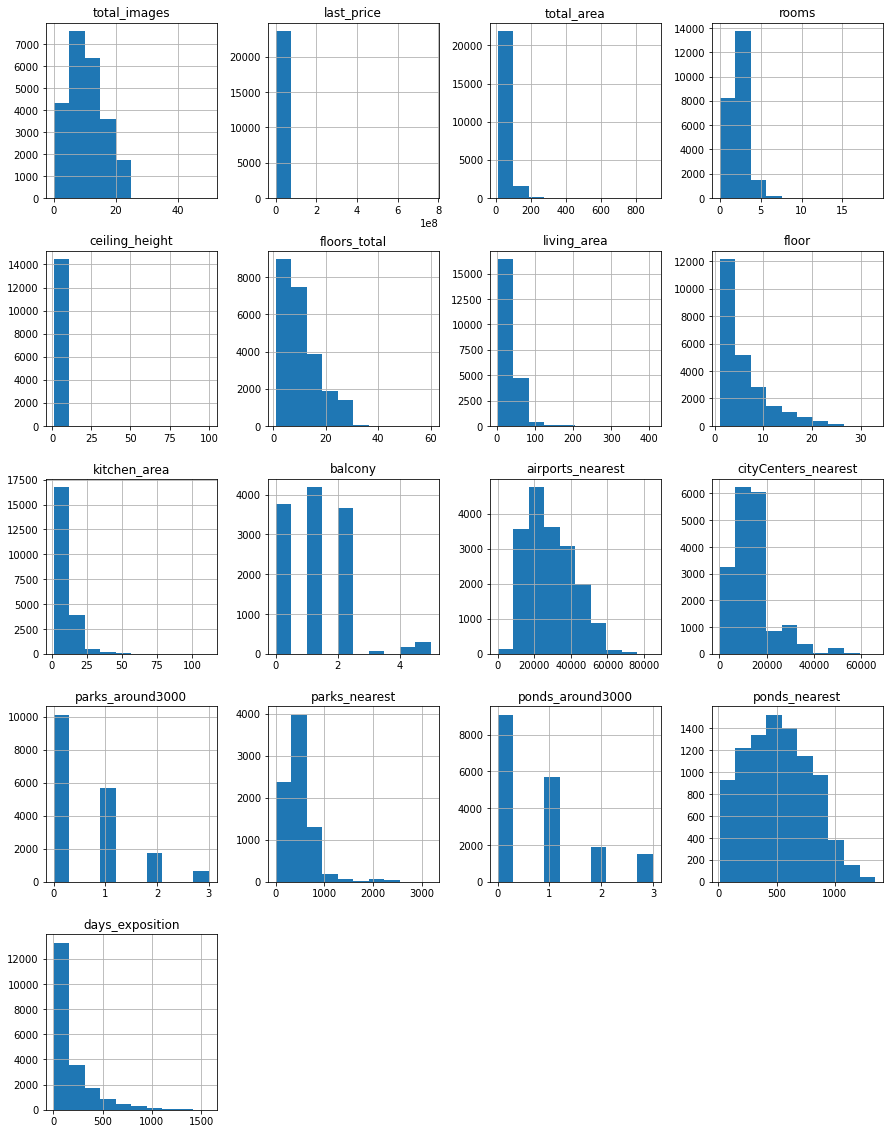

In [5]:
df.hist(figsize=(15,20))

### Предобработка данных

*2.1. Найдём и заполним пропущенные значения в столбцах*

*Определяем, какой процент пропусков, и в каких колонках* 

In [6]:
df.isna().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

*Заполним пропущенные значения там, где это возможно.*

*Пропущенные значения в высоте потолков заполним средним значением*

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
    

*Посмотрим на пропущенные значения в столбце жилой  площадь по отношению к общей площади*

In [8]:
df[(df['living_area'].isna()) & (df['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.77,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,2.77,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,2.77,9.00,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,2.77,22.00,NaN,3,NaN,False,False,NaN,1.00,Санкт-Петербург,30471.00,11603.00,1.00,620.00,1.00,1152.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.00,80.30,2018-07-03T00:00:00,3,2.70,12.00,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.00,33719.00,0.00,NaN,2.00,562.00,60.00
23663,12,6400000.00,88.00,2018-01-12T00:00:00,4,2.55,10.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.00,13943.00,0.00,NaN,2.00,844.00,59.00
23670,9,2450000.00,45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,2500000.00,35.00,2017-12-08T00:00:00,1,2.77,9.00,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00


*Определим функцию для подсчета пропусков и вывода метода describe*

In [9]:
def disp_column (column):
    print('Количество пропусков:', column.isna().sum())
    print(column.describe())
    print('Уникальные значения:',column.nunique())

*Функция для вывода гистограмм*

In [10]:
def colum_h (data, xname, title):
    plt.figure(figsize=(10, 5))
    data.hist()
    plt.xlabel(xname)
    plt.title(title)
    plt.show()

In [11]:
disp_column(df['living_area'])

Количество пропусков: 1903
count   21796.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64
Уникальные значения: 1782


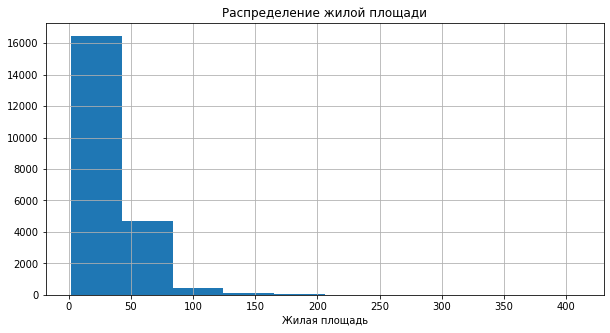

In [12]:
colum_h (df.living_area,'Жилая площадь', 'Распределение жилой площади')

*Определим соотношение жилой площади к общей*

In [13]:
ratio_area_l = df[df['living_area'].isnull() == False]['total_area'].mean() / df[df['living_area'].isnull()== False]['living_area'].mean() 

*Заменим пропуски средним относительным значением*

In [14]:
df['living_area'] = df['living_area'].fillna(df['total_area'] / ratio_area_l)

*пропуски заменим на отсутствующие значения*

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(df['is_apartment'] == False)

*Определим соотношение кухни к общей площади*

In [16]:
ratio_area_k = df[df['kitchen_area'].isnull() == False]['total_area'].mean() / df[df['kitchen_area'].isnull()== False]['kitchen_area'].mean() 

*Заменим пропуски средним относительным значением*

In [17]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / ratio_area_k)

*Заполним пропуски заглушкой 777*

In [18]:
df['balcony'] = df['balcony'].fillna(777)

In [19]:
df['floors_total'] = df['floors_total'].fillna(777)

In [20]:
df['days_exposition'] = df['days_exposition'].fillna(7777)

*Заполним пропуски на пустую строку.*



In [21]:
df['locality_name'] = df['locality_name'].fillna('')

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

**Наблюдения**
Были обнаружены пропуски в 14 столбцах. 
1.	Высота потолков 39% пропусков 
Взаимосвязь прослеживается с типом квартиры (студия, апартаменты, открытая планировка), вероятно пропуски случайные, владелец мог пропустить этот пункт. Поэтому заполним их средним значением  2.77 
2.	Жилая площадь 8% пропусков.
Пропуски полностью случайные, так как общая площадь квартиры и даже площадь кухни указана. Поэтому можно заполнить пропуски средним относительным значением (жилой площади к общей) рассчитанным по известным данным. 
3.	В столбце (is_apartment) пропущено 88 % данных
Из названия столбца, очевидно, что в нем содержатся данные указывающие  на тип квартиры,  который относится к апартаментам.  50 объектов относятся к апартаментам, остальные нет, тогда и пропуски заменим на отсутствующие значения. 
4.	Площадь кухни 10% пропусков.
Заполним пропуски по аналогии с жилой площадью. 
5.	Наличие балконов 49% пропусков. 
Так как рассчитать наличие балконов сложно, можно заполнить пропуски нулевым значением, что бы не потерять данные. 
6. 
7. В столбцах с расстоянием до ближайшего аэропорта и  центра города 23% пропусков.
8. 
9. В столбцах Парки и пруды в радиусе 3 км тоже 23% пропусков. 
Основное количество пропусков в этих столбцах сосредоточено в поселках и деревнях, поэтому логично, что эти данные пропущены. Заменить не представляется возможным, потому оставим значения как есть. 

10. 
11. В колонках парки и водоемы по близости 62% - 66% пропущенных значений.
Возможно, они были пропущены в виду их отсутствия. Поэтому эти пропуски тоже оставим как есть. 
12. В колонке с днями публикации 13% пропусков.
Значения пропущены за 2017 по 2019 годы. Возможно, эти объекты еще не проданы и количество  дней продажи, поэтому не указано. Заполню пропуски заглушкой 7777. 
13. В колонке с этажностью дома пропущено 86 наблюдений это меньше 1% данных.
Так как предсказать этажность дома по этажу квартиры или медианному значению уникальных значений невозможно, заполню пропуски заглушкой 777
14. В столбце locality_name отсутствуют 49 значений. 
Заменю пропуски на пустые строки.  


In [22]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

*Приведем данные в столбцах к целым числам для удобства и экономии памяти* 

In [23]:
df['total_area'] = df['total_area'].astype(int)

In [24]:
df['living_area'] = df['living_area'].astype(int)

In [25]:
df['floors_total'] = df['floors_total'].astype(int)

In [26]:
df['balcony'] = df['balcony'].astype(int)

In [27]:
df['days_exposition'] = df['days_exposition'].astype(int)

*Преобразуем формат данных из типа объект в тип дата для возможных вычислений*  

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

*Заменим буквы*

In [29]:
df['locality_name'] = df['locality_name'].str.replace('ё','е', regex=True)

*Удалим неявные дубликаты в названиях населённых пунктов*

In [30]:
df['locality_name'] = df['locality_name'].replace(
    ['коттеджный ', 'станции ', 'садовое товарищество ', 
     'село ', 'городской поселок ', 'деревня ', 'поселок ', 
     'городского типа ','садоводческое некоммерческое товарищество ','при железнодорожной '], '', regex=True)

*Переименуем столбцы в едином стиле*

In [31]:
df = df.rename(
 columns={
'cityCenters_nearest': 'city_centers_nearest'}
)



**Проверим столбцы на аномальные значения**

In [32]:
disp_column(df['ceiling_height'])

Количество пропусков: 0
count   23699.00
mean        2.77
std         0.99
min         1.00
25%         2.60
50%         2.77
75%         2.77
max       100.00
Name: ceiling_height, dtype: float64
Уникальные значения: 184


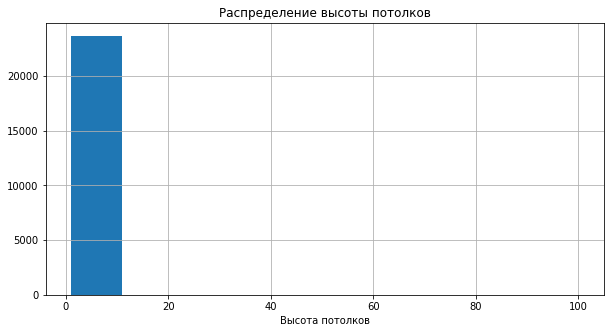

In [33]:
colum_h (df.ceiling_height,'Высота потолков', 'Распределение высоты потолков')

*Здесь видны аномальные значения в высоте потолка от 25 до 100 метров. Вероятно, при заполнении этих данных были допущены ошибки. Значения больше 9 разделим на 10 для получения более достоверной информации о высоте потолков*

In [34]:
 for i in df['ceiling_height']:
     if i >= 9:
         df['ceiling_height'] = df['ceiling_height'].replace({i: i/10})

### Добавим новые столбцы

*Добавим новый столбец с ценой за один квадратный метр*

In [35]:
df['cost_per_meter'] = df['last_price'] / df['total_area']

*Добавим столбцы: день недели, год и месяц публикации*

In [36]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [37]:
df['week_exposition'] = df['first_day_exposition'].dt.dayofweek

In [38]:
df['year_exposition'] = df['first_day_exposition'].dt.year

*Функция, которая вернет тип этажа квартиры и добавит новый столбец*

In [39]:
def flat_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
 
df['flat_type'] = df.apply(flat_type, axis = 1)

*Добавим столбец с расстоянием до центра города в км и округлим до целых значений*

In [40]:
df['city_center_distance'] = df['city_centers_nearest'] / 1000

In [41]:
df['city_center_distance'] = df['city_center_distance'].round()

###  Проведите исследовательский анализ данных

**Изучим следующие параметры объектов:**

***1. Общая площадь***

In [42]:
disp_column(df['total_area'])

Количество пропусков: 0
count   23699.00
mean       60.12
std        35.67
min        12.00
25%        40.00
50%        52.00
75%        69.00
max       900.00
Name: total_area, dtype: float64
Уникальные значения: 310


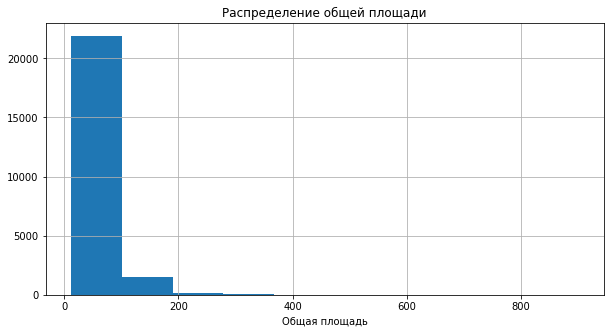

In [43]:
colum_h (df.total_area,'Общая площадь', 'Распределение общей площади')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c6e1efa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c46d26a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c6e1ec40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c46d2d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c46c4100>],
 'means': []}

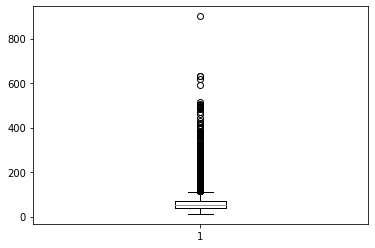

In [44]:
plt.boxplot(df['total_area'])

In [45]:
df.query('total_area >= 550.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance
3117,19,140000000.00,631,2019-03-30,7,2.77,5,361,5,False,False,False,60.00,777,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,7777,221870.05,3,5,2019,последний,5.00
5358,20,65000000.00,590,2019-02-14,15,3.50,6,409,3,False,False,False,100.00,777,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14,110169.49,2,3,2019,другой,5.00
12859,20,140000000.00,631,2019-04-09,7,3.90,4,322,4,False,False,False,19.50,1,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,7777,221870.05,4,1,2019,последний,5.00
15651,20,300000000.00,618,2017-12-18,7,3.40,7,258,5,False,False,False,70.00,777,Санкт-Петербург,32440.00,5297.00,0.00,NaN,2.00,198.00,111,485436.89,12,0,2017,другой,5.00
19540,8,420000000.00,900,2017-12-06,12,2.80,25,409,25,False,False,False,112.00,777,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106,466666.67,12,2,2017,последний,8.00


In [46]:
df.query('total_area <= 12.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance
19904,4,2400000.00,12,2017-07-19,1,2.55,5,10,2,False,False,False,2.09,777,Санкт-Петербург,21314.00,964.00,1.00,886.00,2.00,45.00,200,200000.00,7,2,2017,другой,1.00


*Создадим столбец с категориями общей площади total_type_area*

In [47]:
def type_area (area):
    try:
        if 0 <= area <= 40:
            return '0-40 кв'
        elif 41 <= area <= 60:
            return '40-60 кв'
        elif 61 <= area <= 100:
            return '60-100 кв'
        elif 101 <= area <= 200:
            return '100-200 кв'
        elif area >= 201:
            return 'от 200 кв'
    except:
        pass

In [48]:
df['total_type_area'] = df['total_area'].apply(type_area)

**Наблюдения:** 
*Есть 5 объектов с площадью 590 -900 кв. м. В 5-8 км от центра СПб. кол-во комнат от 7 до 15, расположенные либо на последнем этаже дома (типа Пентхаус) либо на предпоследнем (скорее всего двух или тех этажные квартиры, судя по высоте потолков) Эти объекты можно рассматривать как отдельную категорию элитной недвижимости*

**Баг-репорт** *Объекты с индексом 3117 и 12859 Вероятнее всего дубликаты. Так же есть объект 25 кв м. с ценой за метр 600 000, Индекс объекта 22869.Нужна проверка*

***2. Жилая площадь***

In [49]:
disp_column(df['living_area'])

Количество пропусков: 0
count   23699.00
mean       34.34
std        22.37
min         2.00
25%        19.00
50%        30.00
75%        42.00
max       409.00
Name: living_area, dtype: float64
Уникальные значения: 219


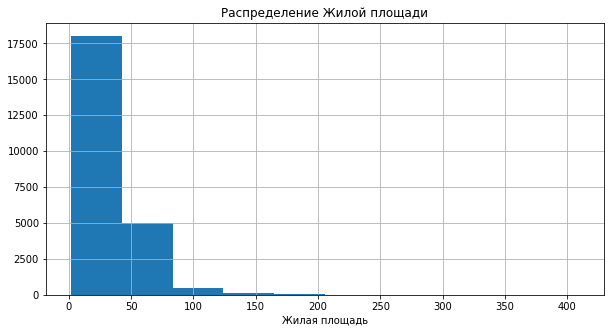

In [50]:
colum_h (df.living_area,'Жилая площадь', 'Распределение Жилой площади')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c6fefac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c6ffe1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c6fef760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c6ffe880>],
 'fliers': [],
 'means': []}

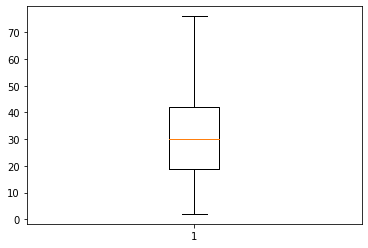

In [51]:
plt.boxplot(df['living_area'], showfliers=False)


In [52]:
df.query('living_area >= 350.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area
3117,19,140000000.00,631,2019-03-30,7,2.77,5,361,5,False,False,False,60.00,777,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,7777,221870.05,3,5,2019,последний,5.00,от 200 кв
5358,20,65000000.00,590,2019-02-14,15,3.50,6,409,3,False,False,False,100.00,777,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14,110169.49,2,3,2019,другой,5.00,от 200 кв
19540,8,420000000.00,900,2017-12-06,12,2.80,25,409,25,False,False,False,112.00,777,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106,466666.67,12,2,2017,последний,8.00,от 200 кв


In [53]:
df.query('living_area <= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area
6,6,3700000.00,37,2017-11-02,1,2.77,26,10,6,False,False,False,14.40,1,Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155,100000.00,11,3,2017,другой,19.00,0-40 кв
114,5,4000000.00,21,2019-02-07,1,2.90,8,8,7,False,False,False,6.30,777,Санкт-Петербург,27089.00,5791.00,2.00,488.00,1.00,286.00,7777,190476.19,2,3,2019,другой,6.00,0-40 кв
248,7,4100000.00,31,2015-08-02,1,3.00,17,10,6,False,False,False,5.39,0,Санкт-Петербург,39771.00,8672.00,1.00,139.00,0.00,NaN,637,132258.06,8,6,2015,другой,9.00,0-40 кв
615,15,4100000.00,43,2017-06-30,1,2.77,18,10,12,False,False,False,20.00,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,18,95348.84,6,4,2017,другой,NaN,40-60 кв
680,14,7200000.00,43,2017-10-31,1,2.77,8,9,2,False,False,False,23.00,777,Санкт-Петербург,23900.00,5232.00,1.00,2137.00,1.00,933.00,296,167441.86,10,1,2017,другой,5.00,40-60 кв
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23014,8,2250000.00,28,2017-08-04,1,3.70,3,10,2,False,False,False,7.30,777,Ломоносов,49713.00,53138.00,2.00,170.00,3.00,110.00,424,80357.14,8,4,2017,другой,53.00,0-40 кв
23208,12,4800000.00,37,2016-02-24,1,2.77,14,8,11,False,False,False,22.00,0,Санкт-Петербург,27838.00,12387.00,2.00,358.00,1.00,950.00,139,129729.73,2,2,2016,другой,12.00,0-40 кв
23359,10,3114406.00,36,2018-10-01,1,2.77,5,10,5,False,False,False,6.29,777,Санкт-Петербург,47303.00,25866.00,1.00,251.00,1.00,350.00,145,86511.28,10,0,2018,последний,26.00,0-40 кв
23481,1,3000000.00,37,2019-04-15,1,2.77,19,10,10,False,False,False,16.88,777,Санкт-Петербург,37006.00,15157.00,0.00,NaN,0.00,NaN,7,81081.08,4,0,2019,другой,15.00,0-40 кв


*Создадим столбец с категориями жилой площади*

In [54]:
df['living_type_area'] = df['living_area'].apply(type_area)

**Наблюдения:**
*Здесь обнаружены ошибки в заполнении жилой площади, индекс  23574 общая площадь 139 кв. жилая 3 кв. кухня 16 кв. Явная ошибка при заполнении данных. Так же  значения жилой площади от  2-10 кв. заполнены некорректно. Значения очень маленькие или площадь кухни превышает значение жилой площади. Эти кварты не относятся к категориям, “студия” или “свободной планировки”. Это все однокомнатные квартиры.*

**Баг-репорт** Нужна проверка значений площадь от 2 до 10 кв. 

***3. Площадь кухни***

In [55]:
disp_column(df['kitchen_area'])

Количество пропусков: 0
count   23699.00
mean       10.50
std         6.04
min         1.30
25%         7.00
50%         9.00
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64
Уникальные значения: 1693


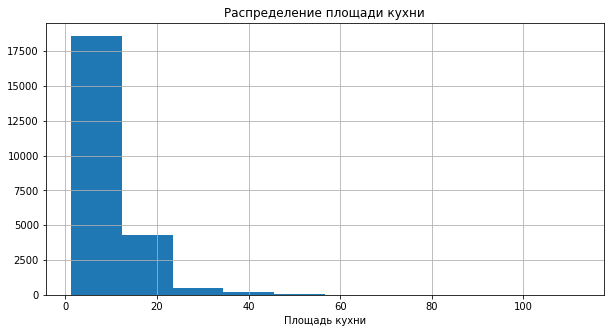

In [56]:
colum_h (df.kitchen_area,'Площадь кухни', 'Распределение площади кухни')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Как аналог можно автоматизировать построение графиков с помощью цикла `for`. 
</div>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c702b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c702b5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c702b6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c48ef4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c48eff70>],
 'means': []}

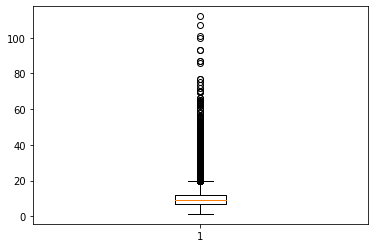

In [57]:
plt.boxplot(df['kitchen_area'])

In [58]:
df.query('kitchen_area >= 60.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
492,18,95000000.00,216,2017-12-05,4,3.00,5,86,4,False,False,False,77.00,777,Санкт-Петербург,21740.00,436.00,2.00,138.00,3.00,620.00,14,439814.81,12,1,2017,другой,0.00,от 200 кв,60-100 кв
581,20,65000000.00,365,2019-03-18,7,2.90,7,209,7,False,False,False,63.51,777,Санкт-Петербург,19827.00,1690.00,3.00,378.00,3.00,58.00,7777,178082.19,3,0,2019,последний,2.00,от 200 кв,от 200 кв
1026,20,155000000.00,310,2018-10-12,5,5.30,3,190,3,False,False,False,63.00,2,Санкт-Петербург,24899.00,4785.00,0.00,NaN,1.00,603.00,7777,500000.00,10,4,2018,последний,5.00,от 200 кв,100-200 кв
1085,16,75000000.00,323,2017-07-10,5,4.00,5,255,4,False,False,False,66.00,777,Санкт-Петербург,23713.00,594.00,3.00,398.00,2.00,515.00,259,232198.14,7,0,2017,другой,1.00,от 200 кв,от 200 кв
1388,20,59800000.00,399,2015-01-21,5,5.60,6,228,6,False,False,False,69.42,0,Санкт-Петербург,26204.00,6934.00,2.00,149.00,2.00,577.00,719,149874.69,1,2,2015,последний,7.00,от 200 кв,от 200 кв
2489,9,12500000.00,255,2017-04-21,3,2.77,2,153,2,False,False,False,100.70,0,Санкт-Петербург,29544.00,6916.00,0.00,NaN,3.00,198.00,102,49019.61,4,4,2017,последний,7.00,от 200 кв,100-200 кв
3117,19,140000000.00,631,2019-03-30,7,2.77,5,361,5,False,False,False,60.00,777,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,7777,221870.05,3,5,2019,последний,5.00,от 200 кв,от 200 кв
3561,5,12300000.00,115,2017-08-09,3,2.70,20,45,16,False,False,False,60.00,1,Санкт-Петербург,33386.00,14234.00,0.00,NaN,0.00,NaN,63,106956.52,8,2,2017,другой,14.00,100-200 кв,40-60 кв
4394,20,57000000.00,174,2015-11-09,3,3.20,10,95,6,False,False,False,77.00,777,Санкт-Петербург,31706.00,4166.00,1.00,193.00,3.00,199.00,1039,327586.21,11,0,2015,другой,4.00,100-200 кв,60-100 кв
5358,20,65000000.00,590,2019-02-14,15,3.50,6,409,3,False,False,False,100.00,777,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14,110169.49,2,3,2019,другой,5.00,от 200 кв,от 200 кв


In [59]:
df.query('kitchen_area <= 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
906,15,2600000.00,27,2017-07-10,1,2.75,23,18,18,False,False,False,2.00,0,Санкт-Петербург,22131.00,17459.00,0.00,NaN,1.00,411.00,10,96296.30,7,0,2017,другой,17.00,0-40 кв,0-40 кв
6262,9,3100000.00,24,2018-06-25,2,3.00,5,16,5,False,False,False,2.00,777,Санкт-Петербург,31960.00,4914.00,2.00,426.00,1.00,936.00,54,129166.67,6,0,2018,последний,5.00,0-40 кв,0-40 кв
9138,17,2920000.00,23,2018-12-12,1,2.77,3,21,1,False,False,False,2.00,777,Санкт-Петербург,19506.00,4008.00,0.00,NaN,2.00,45.00,107,126956.52,12,2,2018,первый,4.00,0-40 кв,0-40 кв
11033,6,5350000.00,32,2016-04-20,1,2.77,14,16,10,False,False,False,2.00,0,Санкт-Петербург,19008.00,3953.00,0.00,NaN,1.00,69.00,210,167187.50,4,2,2016,другой,4.00,0-40 кв,0-40 кв
16367,2,2720000.00,25,2017-10-30,1,2.77,19,22,11,False,False,False,2.00,777,Санкт-Петербург,14472.00,13268.00,0.00,NaN,0.00,NaN,109,108800.00,10,0,2017,другой,13.00,0-40 кв,0-40 кв
19642,5,1190000.00,14,2018-07-29,1,2.77,5,11,1,False,False,False,2.00,777,Санкт-Петербург,9898.00,11122.00,0.00,NaN,0.00,NaN,4,85000.00,7,6,2018,первый,11.00,0-40 кв,0-40 кв
20217,7,4250000.00,28,2019-05-01,1,2.80,14,19,10,False,False,False,1.30,777,Санкт-Петербург,37199.00,12721.00,0.00,NaN,0.00,NaN,7777,151785.71,5,2,2019,другой,13.00,0-40 кв,0-40 кв
21419,4,1870000.00,20,2018-03-06,1,2.50,5,14,1,False,False,False,2.00,777,Санкт-Петербург,16652.00,15654.00,1.00,619.00,1.00,937.00,45,93500.00,3,1,2018,первый,16.00,0-40 кв,0-40 кв


**Наблюдения:**
*Данные по площади кухни вполне реалистичные. Есть крайние значения но они напрямую связаны с общей площадью*

***4. Цена объекта***

In [60]:
disp_column(df['last_price'])

Количество пропусков: 0
count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64
Уникальные значения: 2978


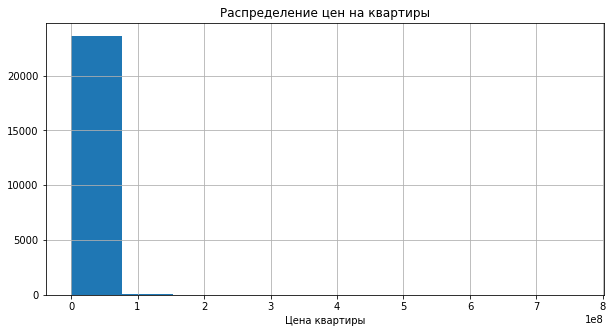

In [61]:
colum_h (df.last_price,'Цена квартиры', 'Распределение цен на квартиры')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c71e1df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c7206e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c71e13a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c7206280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c6b0e310>],
 'means': []}

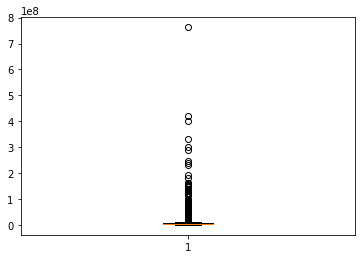

In [62]:
plt.boxplot(df['last_price'])


In [63]:
df.query('last_price >= 400000000.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
12971,19,763000000.00,400,2017-09-30,7,2.77,10,250,10,False,False,False,69.60,2,Санкт-Петербург,25108.00,3956.00,1.00,530.00,3.00,756.00,33,1907500.00,9,5,2017,последний,4.00,от 200 кв,от 200 кв
14706,15,401300000.00,401,2016-02-20,5,2.77,9,204,9,False,False,False,24.00,3,Санкт-Петербург,21912.00,2389.00,1.00,545.00,1.00,478.00,393,1000748.13,2,5,2016,последний,2.00,от 200 кв,от 200 кв
19540,8,420000000.00,900,2017-12-06,12,2.80,25,409,25,False,False,False,112.00,777,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106,466666.67,12,2,2017,последний,8.00,от 200 кв,от 200 кв


In [64]:
df.query('last_price <= 15000.00')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
8793,7,12190.00,109,2019-03-20,2,2.75,25,32,25,False,False,False,40.50,777,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8,111.83,3,2,2019,последний,9.00,100-200 кв,0-40 кв


*Уберем два аномальных значения*

In [65]:
df = df[(df['last_price'] != 12190.00) & (df['last_price'] != 763000000.00)]

In [66]:
disp_column(df['last_price'])

Количество пропусков: 0
count       23697.00
mean      6509902.19
std       9715219.27
min        430000.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     420000000.00
Name: last_price, dtype: float64
Уникальные значения: 2976


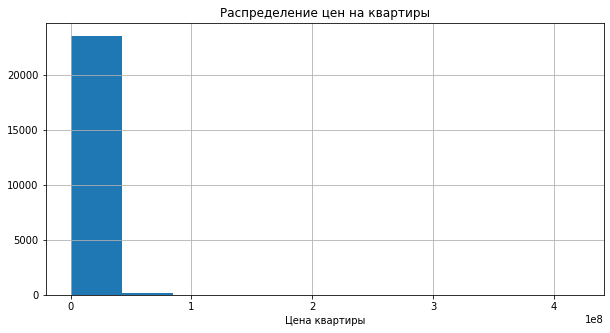

In [67]:
colum_h(df.last_price,'Цена квартиры', 'Распределение цен на квартиры')

**Наблюдения:**
Есть два крайних, подозрительных значения одно в элитной категории, но цена в два раза превышает значения подобной квартиры по площади. И второе аномально маленькое значение. Уберем эти два значения так как они сильно повлияют на выбросы

**Баг-репорт** Нужна проверка значений
* Цена объекта с индексом 12971 представляется нереалистично завышенной 2 мил. за квадратный метр. Объект с индексом 8793 наоборот стоит 111 руб. за кв. м*

***5. Количество комнат***

In [68]:
disp_column(df['rooms'])

Количество пропусков: 0
count   23697.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64
Уникальные значения: 17


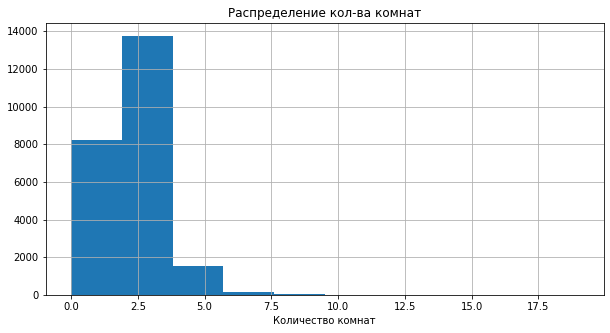

In [69]:
colum_h (df.rooms,'Количество комнат', 'Распределение кол-ва комнат')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c6ef8370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c6ef8a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c6eebfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c6f04130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c6f04490>],
 'means': []}

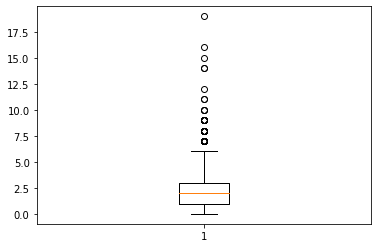

In [70]:
plt.boxplot(df['rooms'])

In [71]:
df.query('rooms >= 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
648,3,17500000.00,183,2018-07-01,11,3.40,7,138,7,False,False,False,13.30,777,Санкт-Петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,7777,95628.42,7,6,2018,последний,3.00,100-200 кв,100-200 кв
813,7,16500000.00,229,2016-02-25,8,2.77,6,160,5,False,False,False,25.00,777,Санкт-Петербург,23968.00,4536.00,1.00,243.00,0.00,NaN,806,72052.40,2,3,2016,другой,5.00,от 200 кв,100-200 кв
866,5,25000000.00,363,2017-12-23,14,3.16,5,222,4,False,False,False,16.60,777,Санкт-Петербург,38076.00,7950.00,0.00,NaN,2.00,435.00,418,68870.52,12,5,2017,другой,8.00,от 200 кв,от 200 кв
4149,6,23000000.00,272,2018-01-11,10,3.14,7,145,7,False,False,False,18.80,1,Санкт-Петербург,10726.00,12169.00,1.00,191.00,1.00,531.00,7777,84558.82,1,3,2018,последний,12.00,от 200 кв,100-200 кв
4435,13,22190000.00,191,2017-12-05,8,2.90,6,115,1,False,False,False,5.00,777,Санкт-Петербург,21589.00,1152.00,1.00,587.00,2.00,155.00,115,116178.01,12,1,2017,первый,1.00,100-200 кв,100-200 кв
5358,20,65000000.00,590,2019-02-14,15,3.50,6,409,3,False,False,False,100.00,777,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14,110169.49,2,3,2019,другой,5.00,от 200 кв,от 200 кв
7857,11,150000000.00,230,2017-10-25,8,2.77,8,220,8,False,False,False,40.02,777,Санкт-Петербург,25525.00,5845.00,2.00,116.00,0.00,NaN,135,652173.91,10,2,2017,последний,6.00,от 200 кв,от 200 кв
8758,5,16100000.00,150,2018-07-10,8,2.92,5,107,1,False,False,False,7.20,777,Санкт-Петербург,26080.00,4782.00,2.00,473.00,0.00,NaN,7777,107333.33,7,1,2018,первый,5.00,100-200 кв,100-200 кв
8822,14,49968900.00,398,2017-07-12,9,3.00,2,160,1,False,False,False,41.00,777,Санкт-Петербург,17720.00,16722.00,3.00,471.00,2.00,440.00,471,125550.00,7,2,2017,первый,17.00,от 200 кв,100-200 кв
8860,12,17000000.00,235,2018-07-14,9,3.00,6,134,3,False,False,False,40.89,777,Санкт-Петербург,24466.00,5034.00,1.00,346.00,0.00,NaN,90,72340.43,7,5,2018,другой,5.00,от 200 кв,100-200 кв


In [72]:
df.query('rooms <= 0 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
144,1,2450000.00,27,2017-03-30,0,2.77,24,15,2,False,True,False,4.70,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181,90740.74,3,3,2017,другой,NaN,0-40 кв,0-40 кв
349,4,2320000.00,25,2017-09-27,0,2.77,14,17,1,False,False,True,4.35,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45,92800.00,9,2,2017,первый,NaN,0-40 кв,0-40 кв
440,8,2480000.00,27,2018-03-12,0,2.77,17,24,4,False,True,False,4.72,2,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64,91851.85,3,0,2018,другой,15.00,0-40 кв,0-40 кв
508,0,3375000.00,34,2017-03-28,0,2.77,26,24,19,False,False,True,5.99,1,Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430,99264.71,3,1,2017,другой,19.00,0-40 кв,0-40 кв
608,2,1850000.00,25,2019-02-20,0,2.77,10,14,7,False,True,False,4.35,777,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,74000.00,2,2,2019,другой,NaN,0-40 кв,0-40 кв
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.00,26,2017-09-01,0,2.77,25,18,16,False,True,False,4.52,0,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14,123076.92,9,4,2017,другой,13.00,0-40 кв,0-40 кв
23442,0,2500000.00,27,2017-09-28,0,2.77,24,18,4,False,False,True,4.82,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4,92592.59,9,3,2017,другой,NaN,0-40 кв,0-40 кв
23554,15,3350000.00,26,2018-09-07,0,2.77,19,14,8,False,True,False,4.52,777,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31,128846.15,9,4,2018,другой,17.00,0-40 кв,0-40 кв
23592,10,1450000.00,29,2017-11-11,0,2.77,9,18,8,False,False,True,5.05,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82,50000.00,11,5,2017,другой,NaN,0-40 кв,0-40 кв


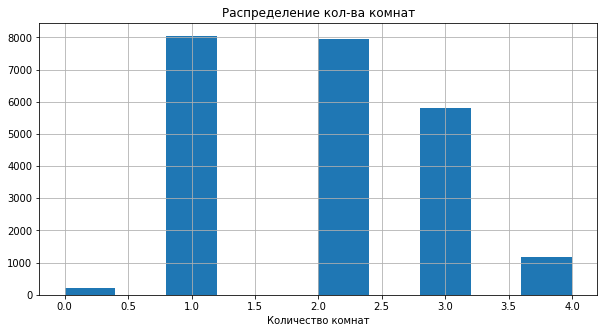

In [73]:
colum_h(df[df['rooms'] < np.quantile (df['rooms'], 0.99)]['rooms'],
       'Количество комнат', 'Распределение кол-ва комнат')

***Наблюдения:***
* В базе объявлений  основные значения находятся в диапазоне  2-х комнатных квартир. Есть 0 комнат, это студии. Так же есть редкие значения от 6- 19 комнат. По большей части они находятся в СПб с общей площадью от 200 кв. Цена за кв.  метр  чуть ниже среднего значения. Если отбросить крайние значения, то распределение будет от 1 до 3-х комнат.*

***6. высота потолков***

In [74]:
disp_column(df['ceiling_height'])

Количество пропусков: 0
count   23697.00
mean        2.74
std         0.24
min         1.00
25%         2.60
50%         2.77
75%         2.77
max        10.00
Name: ceiling_height, dtype: float64
Уникальные значения: 177


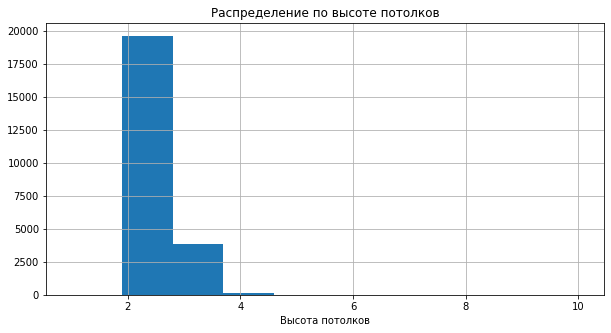

In [75]:
colum_h (df.ceiling_height,'Высота потолков', 'Распределение по высоте потолков')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c6d2d610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c6d2dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c6d2d2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c6d363d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c6d36730>],
 'means': []}

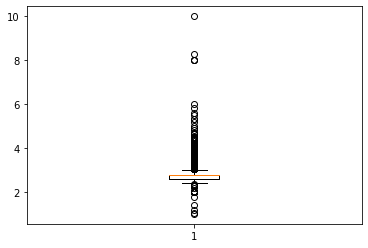

In [76]:
plt.boxplot(df['ceiling_height'])

In [77]:
df.query('ceiling_height >= 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
3474,3,1400000.00,30,2018-03-16,1,8.00,5,15,2,False,False,False,7.30,777,Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125,46666.67,3,4,2018,другой,NaN,0-40 кв,0-40 кв
5863,20,5650000.00,45,2018-08-15,1,8.30,16,19,14,False,False,False,8.30,1,Санкт-Петербург,13069.00,10763.00,0.00,NaN,1.00,613.00,14,125555.56,8,2,2018,другой,11.00,40-60 кв,0-40 кв
15743,14,5600000.00,67,2016-11-11,3,8.00,16,41,1,False,False,False,8.00,777,Санкт-Петербург,32691.00,11035.00,1.00,723.00,0.00,NaN,474,83582.09,11,4,2016,первый,11.00,60-100 кв,40-60 кв
17442,0,5350000.00,54,2015-06-16,2,8.00,5,29,2,False,False,False,9.40,1,Красное Село,24638.00,28062.00,0.00,NaN,0.00,NaN,469,99074.07,6,1,2015,другой,28.00,40-60 кв,0-40 кв
20264,17,119000000.00,187,2017-07-10,4,6.00,7,147,7,False,False,False,15.60,777,Санкт-Петербург,26902.00,5605.00,3.00,484.00,1.00,305.00,259,636363.64,7,0,2017,последний,6.00,100-200 кв,100-200 кв
22869,0,15000000.00,25,2018-07-25,1,10.00,5,14,5,True,False,False,11.00,5,Санкт-Петербург,34963.00,8283.00,1.00,223.00,3.00,30.00,19,600000.00,7,2,2018,последний,8.00,0-40 кв,0-40 кв


In [78]:
df.query('ceiling_height <= 1.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
5712,5,1500000.00,42,2017-08-14,2,1.20,2,27,1,False,False,False,5.20,777,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248,35714.29,8,0,2017,первый,NaN,40-60 кв,0-40 кв
15061,19,5600000.00,56,2018-05-11,2,1.40,14,32,5,False,False,False,9.10,2,Санкт-Петербург,14814.00,13610.00,0.00,NaN,0.00,NaN,315,100000.00,5,4,2018,другой,14.00,40-60 кв,0-40 кв
22309,20,5300000.00,45,2017-09-30,1,1.03,16,15,15,False,False,False,7.83,777,Санкт-Петербург,36353.00,11936.00,2.00,440.00,2.00,450.00,136,117777.78,9,5,2017,другой,12.00,40-60 кв,0-40 кв
22590,16,6000000.00,55,2018-10-31,2,1.00,12,32,7,False,False,False,10.00,777,Санкт-Петербург,33053.00,14217.00,2.00,293.00,2.00,289.00,13,109090.91,10,2,2018,другой,14.00,40-60 кв,0-40 кв


**Наблюдения:**
* В высоте потолков есть  странные значения от 1 до 1.4 кв. м. А так же от 6-10 кв. Если судить из общей площади, то значение могут быть правдоподобными. 

***7.Этаж квартиры***

In [79]:
disp_column(df['floor'])

Количество пропусков: 0
count   23697.00
mean        5.89
std         4.88
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64
Уникальные значения: 33


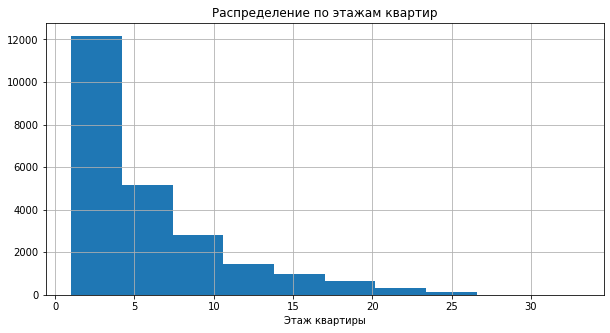

In [80]:
colum_h (df.floor,'Этаж квартиры', 'Распределение по этажам квартир')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c6c81940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c6c8e040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c6c815e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c6c8e700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c6c8ea60>],
 'means': []}

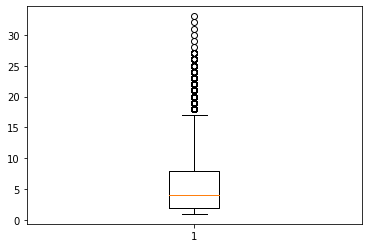

In [81]:
plt.boxplot(df['floor'])

In [82]:
df.query('floor >= 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
1917,13,10150000.00,74,2017-11-17,2,2.80,35,34,30,False,False,False,13.00,777,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,7777,137162.16,11,4,2017,другой,20.00,60-100 кв,0-40 кв
11575,9,9900000.00,101,2016-04-28,3,2.77,33,53,32,False,False,False,21.00,0,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,53,98019.80,4,3,2016,другой,20.00,100-200 кв,40-60 кв
18218,4,9900000.00,101,2018-09-27,3,2.77,35,53,33,False,False,False,13.70,2,Санкт-Петербург,18737.00,20450.00,0.00,NaN,3.00,72.00,7,98019.80,9,3,2018,другой,20.00,100-200 кв,40-60 кв
18629,20,5700000.00,54,2017-12-08,1,2.77,35,21,31,False,False,False,18.00,777,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,128,105555.56,12,4,2017,другой,20.00,40-60 кв,0-40 кв


**Наблюдения:**
Основная масса объявлений это квартиры расположенные на 1 - 5 этажах. Реже с 5 – 17 этаж.
Дальше идут редкие значения с 17 до 33 этажа


***8.Тип этажа квартиры («первый», «последний», «другой»)***

In [83]:
disp_column(df['flat_type'])

Количество пропусков: 0
count      23697
unique         3
top       другой
freq       17446
Name: flat_type, dtype: object
Уникальные значения: 3


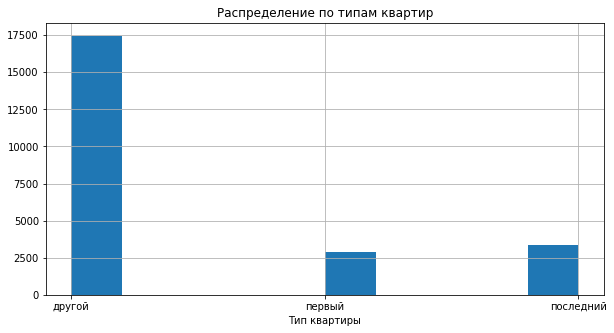

In [84]:
colum_h (df.flat_type,'Тип квартиры', 'Распределение по типам квартир')

**Наблюдения:**
Больше всего квартир расположено выше первого и ниже последнего этажа.

***9.Общее количество этажей в доме***

In [85]:
disp_column(df['floors_total'])

Количество пропусков: 0
count   23697.00
mean       13.45
std        46.55
min         1.00
25%         5.00
50%         9.00
75%        16.00
max       777.00
Name: floors_total, dtype: float64
Уникальные значения: 37


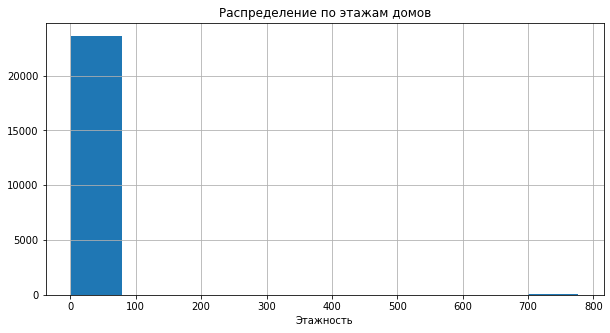

In [86]:
colum_h (df.floors_total,'Этажность', 'Распределение по этажам домов')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c665bf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c6694790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c46f9d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c6694d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c6632760>],
 'means': []}

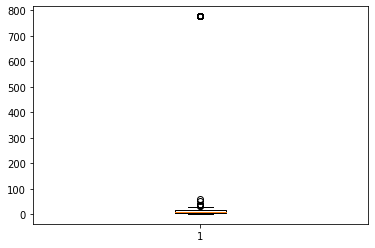

In [87]:
plt.boxplot(df['floors_total'])

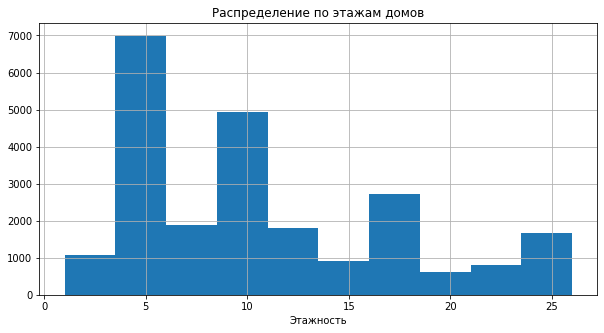

In [88]:
colum_h(df[df['floors_total'] < np.quantile (df['floors_total'], 0.99)]['floors_total'],
       'Этажность', 'Распределение по этажам домов')

**Наблюдения:**
Основная масса продаваемых квартир находятся в пятиэтажках, потом 9, 12 этажей, более редкие это высотки.

***10.Расстояние до центра города в метрах***

In [89]:
disp_column(df['city_centers_nearest'])

Количество пропусков: 5519
count   18178.00
mean    14192.12
std      8608.44
min       181.00
25%      9238.00
50%     13100.00
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64
Уникальные значения: 7642


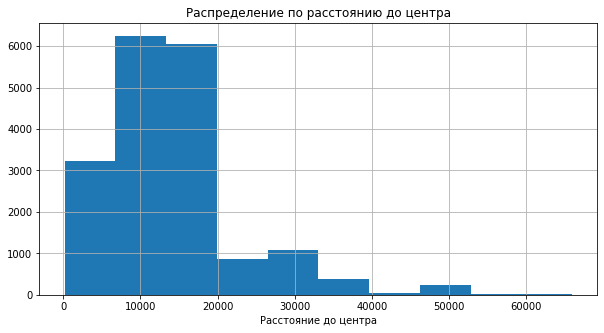

In [90]:
colum_h (df.city_centers_nearest,'Расстояние до центра', 'Распределение по расстоянию до центра')

**Наблюдения:**
Основная масса квартир находятся в пределах  8 – 20 км от центра города. Чуть меньше  это центр города и в радиусе  8 км от центра. 

***11.Расстояние до ближайшего аэропорта***

In [91]:
disp_column(df['airports_nearest'])

Количество пропусков: 5542
count   18155.00
mean    28793.46
std     12631.42
min         0.00
25%     18583.50
50%     26726.00
75%     37274.00
max     84869.00
Name: airports_nearest, dtype: float64
Уникальные значения: 8275


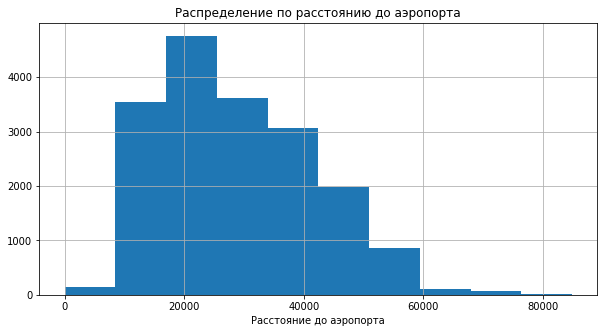

In [92]:
colum_h (df.airports_nearest,'Расстояние до аэропорта', 'Распределение по расстоянию до аэропорта')

**Наблюдения:**
Основная масса квартир находятся в радиусе  10 - 45 км от аэропорта. 

***12.Расстояние до ближайшего парка***

In [93]:
disp_column(df['parks_nearest'])

Количество пропусков: 15620
count   8077.00
mean     490.76
std      342.34
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64
Уникальные значения: 995


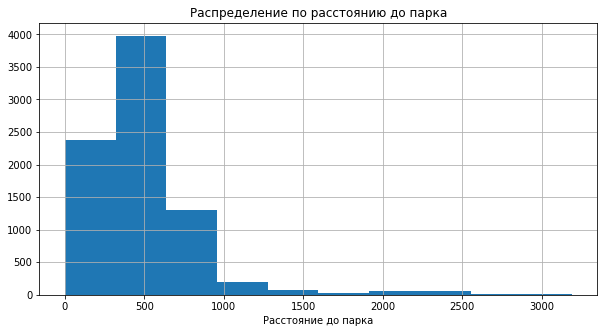

In [94]:
colum_h (df.parks_nearest,'Расстояние до парка', 'Распределение по расстоянию до парка')

**Наблюдения:**
Основная масса квартир находятся в радиусе  от 1 до 10 км до ближайшего парка

***13.День и месяц публикации объявления***

In [95]:
disp_column(df['week_exposition'])

Количество пропусков: 0
count   23697.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: week_exposition, dtype: float64
Уникальные значения: 7


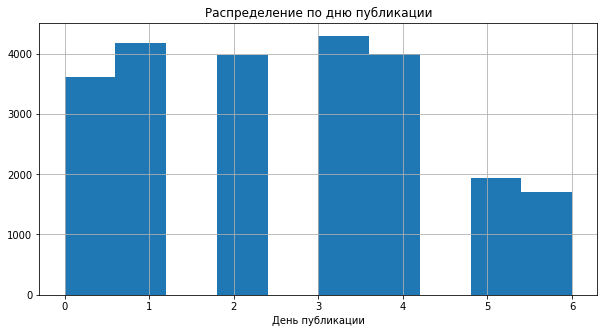

In [96]:
colum_h (df.week_exposition,'День публикации', 'Распределение по дню публикации')

In [97]:
disp_column(df['month_exposition'])

Количество пропусков: 0
count   23697.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64
Уникальные значения: 12


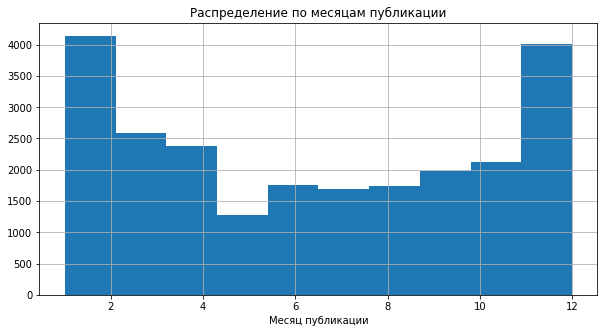

In [98]:
colum_h (df.month_exposition,'Месяц публикации', 'Распределение по месяцам публикации')

**Наблюдения:**
В будние дни публикуют больше объявлений, чем в выходные. С ноября по февраль больше всего публикуют объявлений по продаже квартир.

***Посмотрим, как быстро продавались квартиры*** 

Отфильтруем значения 

In [99]:
quick_sale = df.query('days_exposition != 7777')

In [100]:
disp_column(quick_sale['days_exposition'])

Количество пропусков: 0
count   20516.00
mean      180.90
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64
Уникальные значения: 1141


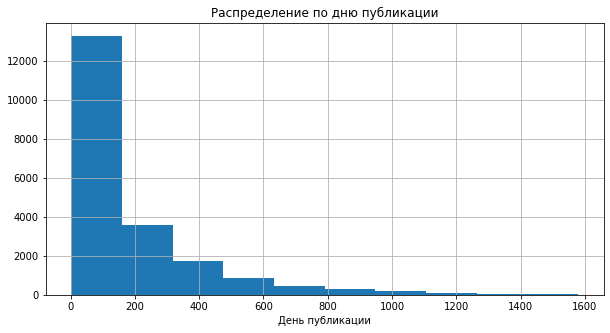

In [101]:
colum_h (quick_sale.days_exposition,'День публикации', 'Распределение по дню публикации')

In [102]:
not_sale = df.query('days_exposition == 7777')

In [103]:
not_sale=not_sale.pivot_table(index='year_exposition', values='days_exposition', 
                     aggfunc=['count'])

Посмотрим сколько квартир еще не продано  

In [104]:
not_sale

,count
,days_exposition
year_exposition,
2014,18
2015,70
2016,67
2017,271
2018,959
2019,1796


# Вывод:
  *В среднем со дня публикации, квартиры продаются от 3 месяцев до полугода*
  * 3.5% квартир продаются в первую неделю
  * 1.5% квартир продаются более 1 года. 
  * Есть 6 квартир, которые продавались более 4-х лет. 
  * 13% Квартир находятся в продаже 
  * 0.6% Находятся в продаже более 4-х лет

***Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта***

In [105]:
df['last_price'].corr(df['total_area'])

0.7026257040865977

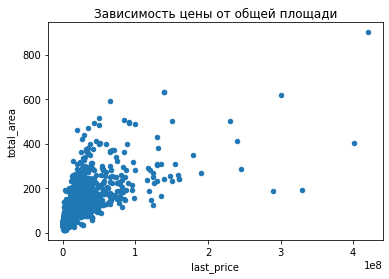

In [106]:
df.plot(x='last_price', y='total_area', kind='scatter')
plt.title('Зависимость цены от общей площади')
plt.show()


In [107]:
df['last_price'].corr(df['living_area'])

0.6260916088185329

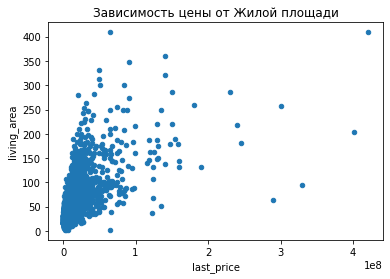

In [108]:
df.plot(x='last_price', y='living_area', kind='scatter')
plt.title('Зависимость цены от Жилой площади')
plt.show()

In [109]:
df['last_price'].corr(df['kitchen_area'])

0.5452322870362805

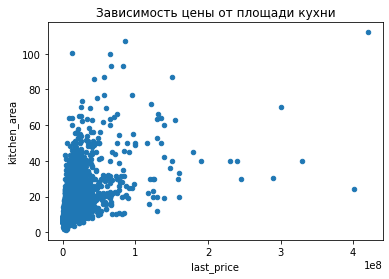

In [110]:
df.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.show()

In [111]:
df['last_price'].corr(df['rooms'])

0.39233567387088714

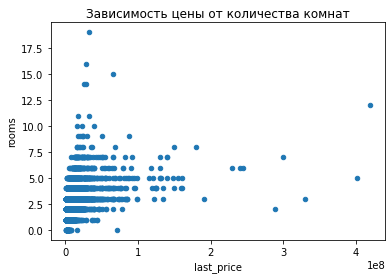

In [112]:
df.plot(x='last_price', y='rooms', kind='scatter')
plt.title('Зависимость цены от количества комнат')
plt.show()

In [113]:
df['last_price'].corr(df['floor'])

0.02713897276295087

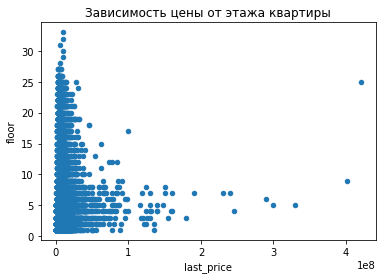

In [114]:
df.plot(x='last_price', y='floor', kind='scatter')
plt.title('Зависимость цены от этажа квартиры')
plt.show()

In [115]:
df['last_price'].corr(df['month_exposition'])

0.0006402232519174582

In [116]:
df['last_price'].corr(df['year_exposition'])

-0.04708620839304995

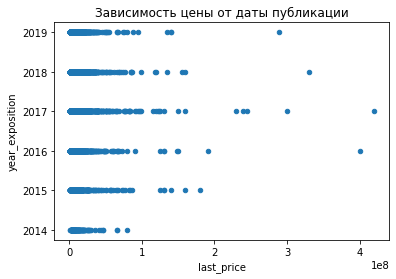

In [117]:
df.plot(x='last_price', y='year_exposition', kind='scatter')
plt.title('Зависимость цены от даты публикации')
plt.show()

Определим функцию для построения сводных таблиц

In [118]:
def data_pivot_column (column):
    result = df.pivot_table(index=column, values='last_price', aggfunc=['count', 'min', 'mean','max'])\
    .reset_index(level=column)
    return result 


Посмотрим на зависимость цены от общей площади.

In [119]:
depends_total_area = data_pivot_column('total_type_area')

In [120]:
depends_total_area.columns = ['Тип общей площади','кол-во квартир', 'мин стоимость', 'сред стоимость', 'макс стоимость']

In [121]:
depends_total_area.sort_values(by='сред стоимость',ascending=True)

,Тип общей площади,кол-во квартир,мин стоимость,сред стоимость,макс стоимость
0,0-40 кв,6276,430000.00,3341177.82,28000000.00
2,40-60 кв,9059,430000.00,4487822.78,39900000.00
3,60-100 кв,6563,730000.00,7633900.61,53000000.00
1,100-200 кв,1574,1450000.00,18923678.98,330000000.00
4,от 200 кв,225,7900000.00,56682547.64,420000000.00


<AxesSubplot:xlabel='Тип общей площади'>

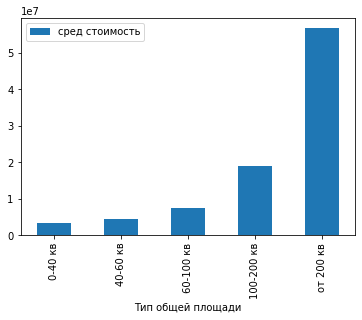

In [122]:
depends_total_area.sort_values(by='сред стоимость',ascending=True).plot(x='Тип общей площади', y=['сред стоимость'], kind='bar')

In [123]:
depends_rooms = data_pivot_column('rooms')

In [124]:
depends_rooms.columns = ['Кол-во комнат','кол-во квартир', 'мин стоимость', 'сред стоимость', 'макс стоимость']

In [125]:
depends_rooms.sort_values(by='сред стоимость',ascending=True)

,Кол-во комнат,кол-во квартир,мин стоимость,сред стоимость,макс стоимость
0,0,197,945750.00,3337724.11,71000000.00
1,1,8047,430000.00,3835361.52,43511000.00
2,2,7939,430000.00,5592307.57,289238400.00
3,3,5814,550000.00,8179118.54,330000000.00
4,4,1180,999000.00,13423497.18,159984000.00
5,5,326,1650000.00,23762082.09,401300000.00
11,11,2,17500000.00,25250000.00,33000000.00
10,10,3,15500000.00,26166666.67,40000000.00
13,14,2,25000000.00,26829500.00,28659000.00
15,16,1,28500000.00,28500000.00,28500000.00


<AxesSubplot:xlabel='Кол-во комнат'>

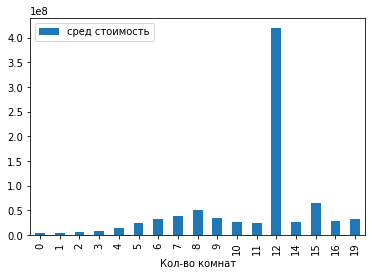

In [126]:
depends_rooms.sort_values(by='Кол-во комнат',ascending=True).plot(x='Кол-во комнат', y=['сред стоимость'], kind='bar')

In [127]:
depends_floor = data_pivot_column('flat_type')

In [128]:
depends_floor.columns = ['Кол-во этажей','кол-во квартир', 'мин стоимость', 'сред стоимость', 'макс стоимость']

In [129]:
depends_floor.sort_values(by='сред стоимость',ascending=True)

,Кол-во этажей,кол-во квартир,мин стоимость,сред стоимость,макс стоимость
1,первый,2917,430000.00,4803560.23,135000000.00
0,другой,17446,450000.00,6675444.24,330000000.00
2,последний,3334,430000.00,7136582.69,420000000.00


***Вывод:***
Как видно  из диагамм рассеивания общие признаки имеют объекты, которые связаны с площадью, это общая площадь, жилая и площадь кухни.  Так де есть корреляция с количеством комнат. 
Больше всего объявлений это квартиры от 1 до 3 комнат  с общей площадью от  30 до 80 кв. м. Менее 10% квартиры от 100-200 кв. м. 1 % составляют квартиры более 200 кв. Средняя стоимость квартир от 0-40 кв. 3 мл. от 40-60 кв. м 4.5 мл. от 60-100 кв. 7.5 мл от 100-200 19 мл свыше 200 кв. 56.6 мл. Однокомнатные квартиры стоят 3.8 мил, двухкомнатные 5,6 мил и трехкомнатные 8,2 мил.
Квартиры с меньшей площадью имеют достаточно уравновешенные показатели так средняя, максимальная и минимальная цена у них достаточно стабильна, а вот у квартир от 100 кв. м и выше, вариабельность сильно возрастает и достигает своего пика в квартирах более 200 кв. м. С комнатами зависимость пропадает у квартир более 5 комнат. Следовательно, общая площадь  напрямую влияет на конечную стоимость объекта, если квартиры от 30-100 кв. м. Количество комнат  от 1 до 3 тоже имеет прямое влияние на цену.  

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.** 

In [130]:
h = df['locality_name'].value_counts().head(10)

In [131]:
rt = df.pivot_table(index='locality_name', values='cost_per_meter', aggfunc=['count', 'min', 'mean','max'])\
    .reset_index(level='locality_name')

In [132]:
rt.columns = ['Локация','кол-во обявлений', 'мин стоимость', 'сред стоимость', 'макс стоимость']

In [133]:
rt.sort_values(by='кол-во обявлений',ascending=False).head(10)

,Локация,кол-во обявлений,мин стоимость,сред стоимость,макс стоимость
223,Санкт-Петербург,15719,15384.62,115241.04,1736842.11
146,Мурино,590,50000.00,86729.54,140312.50
106,Кудрово,472,54336.96,95879.32,162025.32
297,Шушары,440,47766.67,79068.60,147826.09
35,Всеволожск,398,31400.00,68985.24,642444.74
202,Пушкин,369,59836.07,103611.36,256521.74
89,Колпино,338,48214.29,75735.59,125000.00
170,Парголово,327,39303.48,90675.63,141891.89
43,Гатчина,307,10507.25,69045.52,146315.79
36,Выборг,237,18750.00,58296.12,107473.12


<AxesSubplot:xlabel='Локация'>

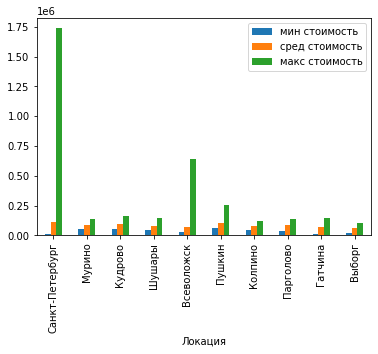

In [134]:
rt.sort_values(by='кол-во обявлений',ascending=False).head(10).plot(x='Локация', y=['мин стоимость', 'сред стоимость', 'макс стоимость'], kind='bar')

In [135]:
rt.sort_values(by='макс стоимость',ascending=False).head()


,Локация,кол-во обявлений,мин стоимость,сред стоимость,макс стоимость
223,Санкт-Петербург,15719,15384.62,115241.04,1736842.11
35,Всеволожск,398,31400.00,68985.24,642444.74
65,Зеленогорск,24,53333.33,115527.92,323943.66
202,Пушкин,369,59836.07,103611.36,256521.74
178,Петергоф,201,51612.90,85259.84,228392.86


<AxesSubplot:xlabel='Локация'>

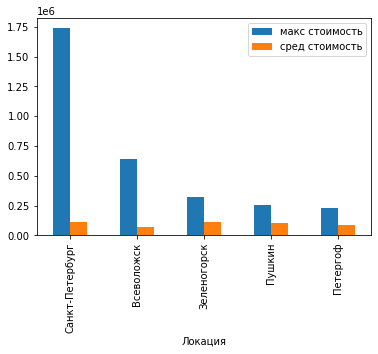

In [136]:
rt.sort_values(by='макс стоимость',ascending=False).head().plot(x='Локация', y=['макс стоимость','сред стоимость'], kind='bar')

<AxesSubplot:xlabel='Локация'>

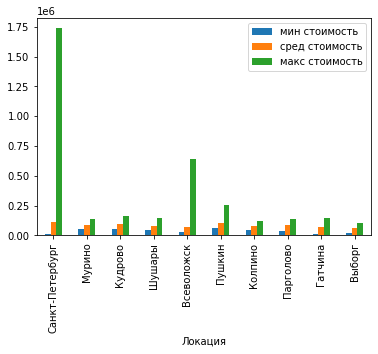

In [137]:
rt.sort_values(by='кол-во обявлений',ascending=False).head(10).plot(x='Локация', y=['мин стоимость', 'сред стоимость', 'макс стоимость'], kind='bar')

In [138]:
rt.sort_values(by='мин стоимость',ascending=True).head()

,Локация,кол-во обявлений,мин стоимость,сред стоимость,макс стоимость
227,Свирь,2,7962.96,11481.48,15000.00
240,Сланцы,112,9615.38,18212.90,43333.33
251,Старополье,3,10465.12,11238.37,12250.00
43,Гатчина,307,10507.25,69045.52,146315.79
21,Будогощь,4,10714.29,31254.11,40540.54


<AxesSubplot:xlabel='Локация'>

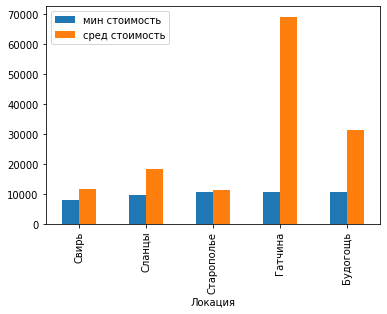

In [139]:
rt.sort_values(by='мин стоимость',ascending=True).head().plot(x='Локация', y=['мин стоимость', 'сред стоимость'], kind='bar')

In [140]:
rt.sort_values(by='сред стоимость',ascending=False).head()

,Локация,кол-во обявлений,мин стоимость,сред стоимость,макс стоимость
65,Зеленогорск,24,53333.33,115527.92,323943.66
223,Санкт-Петербург,15719,15384.62,115241.04,1736842.11
213,Репино,4,69171.35,104313.94,175000.00
202,Пушкин,369,59836.07,103611.36,256521.74
236,Сестрорецк,183,50434.78,102182.27,182688.17


<AxesSubplot:xlabel='Локация'>

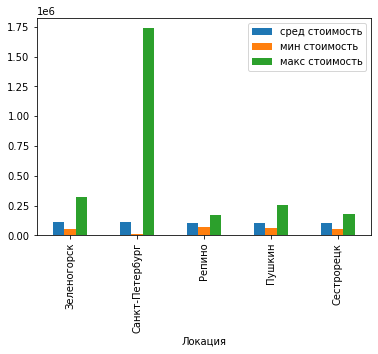

In [141]:
rt.sort_values(by='сред стоимость',ascending=False).head().plot(x='Локация', y=['сред стоимость','мин стоимость','макс стоимость'], kind='bar')

In [142]:
rt.sort_values(by='сред стоимость',ascending=True).head()

,Локация,кол-во обявлений,мин стоимость,сред стоимость,макс стоимость
251,Старополье,3,10465.12,11238.37,12250.00
227,Свирь,2,7962.96,11481.48,15000.00
25,Вахнова Кара,1,11842.11,11842.11,11842.11
38,Выскатка,2,11463.41,12335.48,13207.55
243,Совхозный,2,12555.56,12629.13,12702.70


<AxesSubplot:xlabel='Локация'>

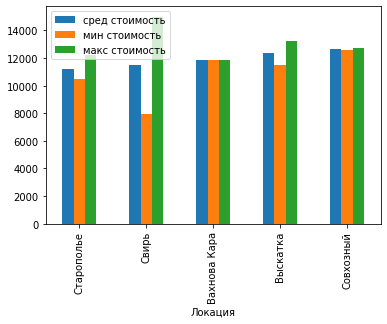

In [143]:
rt.sort_values(by='сред стоимость',ascending=True).head().plot(x='Локация', y=['сред стоимость','мин стоимость','макс стоимость'], kind='bar')

**Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра в зависимости от удаленности от центра города**

In [144]:
spb_cost_per_km = (
    df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_center_distance', values='last_price', aggfunc=['mean'])\
    .reset_index(level='city_center_distance'))

In [145]:
spb_cost_per_km 

,city_center_distance,mean
,,last_price
0,0.00,31449115.85
1,1.00,21206720.83
2,2.00,17788319.61
3,3.00,11126581.00
4,4.00,12213019.38
5,5.00,14499121.06
6,6.00,15338418.39
7,7.00,14775152.59
8,8.00,9957716.83


<AxesSubplot:xlabel='city_center_distance'>

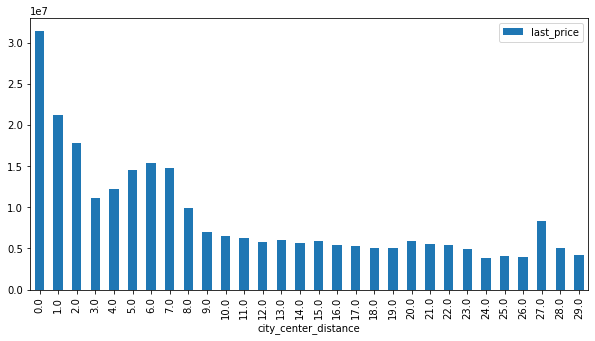

In [146]:
spb_cost_per_km .plot(x='city_center_distance', y='mean', kind='bar', figsize=(10,5))

In [147]:
df.query('city_center_distance == 27').head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,month_exposition,week_exposition,year_exposition,flat_type,city_center_distance,total_type_area,living_type_area
109,2,7497600.00,62,2015-12-08,2,2.77,5,35,5,False,False,False,9.50,777,Пушкин,14517.00,26670.00,1.00,517.00,0.00,NaN,1048,120929.03,12,1,2015,последний,27.00,60-100 кв,0-40 кв
140,8,16912000.00,105,2016-12-09,2,2.70,3,48,1,False,False,False,15.40,777,Пушкин,14352.00,26506.00,3.00,366.00,3.00,179.00,390,161066.67,12,4,2016,первый,27.00,100-200 кв,40-60 кв
439,9,8570000.00,72,2018-08-11,3,3.00,6,42,4,False,False,False,10.00,777,Пушкин,14691.00,26845.00,0.00,NaN,0.00,NaN,149,119027.78,8,5,2018,другой,27.00,60-100 кв,40-60 кв
556,0,3500000.00,28,2018-06-06,1,2.50,5,16,4,False,False,False,5.00,1,Пушкин,14852.00,27006.00,0.00,NaN,0.00,NaN,86,125000.00,6,2,2018,другой,27.00,0-40 кв,0-40 кв
558,13,4500000.00,65,2017-10-27,3,2.60,10,42,7,False,False,False,8.00,2,Металлострой,25531.00,27243.00,0.00,NaN,0.00,NaN,32,69230.77,10,4,2017,другой,27.00,60-100 кв,40-60 кв
748,13,14350000.00,74,2017-11-28,2,3.13,5,30,3,False,False,False,25.00,777,Санкт-Петербург,23888.00,27313.00,1.00,1496.00,0.00,NaN,128,193918.92,11,1,2017,другой,27.00,60-100 кв,0-40 кв
931,8,6650000.00,69,2017-06-20,3,3.20,3,50,2,False,False,False,7.00,777,Пушкин,14950.00,27104.00,1.00,27.00,0.00,NaN,261,96376.81,6,1,2017,другой,27.00,60-100 кв,40-60 кв
1138,1,8000000.00,84,2017-08-22,3,2.50,4,60,1,False,False,False,9.60,777,Пушкин,14528.00,26681.00,3.00,398.00,3.00,213.00,584,95238.10,8,1,2017,первый,27.00,60-100 кв,40-60 кв
1675,4,3300000.00,31,2017-02-20,1,2.50,4,17,3,False,False,False,5.00,777,Пушкин,14528.00,26681.00,3.00,398.00,3.00,213.00,651,106451.61,2,0,2017,другой,27.00,0-40 кв,0-40 кв
1719,12,4200000.00,38,2018-02-12,1,2.70,4,17,3,False,False,False,9.00,1,Пушкин,14982.00,27136.00,3.00,311.00,3.00,557.00,162,110526.32,2,0,2018,другой,27.00,0-40 кв,0-40 кв


**Наблюдения:**
Средняя стоимость квартиры в центре города 31 мил. В радиусе 1 км квартиры стоят 21 мил. 2 км- 18 мил. В радиусе 3 км. От центра цена значительно падает до 11мил. от 4 - 7 км. Цена начинает плавно расти и доходи до 15 мл. с 8-26 км от центра, цена начинает плавно падать и доходит до 4 мл. но на 27 км цена возрастает до 8 мил. 
Это связано с тем, что в 3 км от центра продаются в основном квартиры  от 40-183 кв. в основном в 5 этажных домах. Цена на многие такие объекты ниже среднего по СПб. 
В 27 км от СПб находится город Пушкино, средняя стоимость квартиры здесь всего на 103000р за кв. почти как в СПб 115000р за кв.


### Общий вывод

**Было проведено исследование с целью установить параметры, которые помогут определять рыночную стоимость объектов недвижимости для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности. Данные для исследования взяты из архива сервиса Яндекс Недвижимость, о продаже квартир в Санкт- Петербурге и соседних населенных пунктов за несколько лет.
Перед проведением исследования были поставлены несколько гипотез.**
* Гипотеза 1: Есть ли зависимость цены от общей площади, жилой и площади кухни? 
* Гипотеза 2: Есть ли зависимость цены от количества комнат? 
* Гипотеза 3: Есть ли зависимость цены и этажа, на котором расположена квартира (первый, последний, другой)?
* Гипотеза 4: Есть ли зависимость цены  и даты размещения (день недели, месяц, год).
* Гипотеза 5: Есть ли зависимость цены  от расстояния до центра города.*
*В результате исследования удалось выявить зависимости*
* Гипотеза 1 частично подтверждена.* 
Средняя стоимость квартир 
от 0-40 кв. 3 мл. 
 от 40-60 кв. м 4.5 мл. 
от 60-100 кв. 7.5 мл 
от 100-200 19 мл 
свыше 200 кв. 56.6 мл. 
Средняя стоимость в сегменте от 0до 100 кв. метров достаточно стабильна. Ее можно использовать для определения рыночной стоимости объектов. На цену объектов с общей площадью свыше 100 кв. метров влияет множество других факторов. Поэтому их данные нельзя использовать для расчета средней рыночной цены. 
**Рекомендация: можно добавить дополнительное поле в таблице для выделения элитного жилья, что бы рассчитать его стоимость.**
* Гипотеза 2 частично подтверждена.* 
Однокомнатные квартиры стоят 3.8 мил руб.
Двухкомнатные - 5,6 мил руб.
Трехкомнатные - 8,2 мил руб.
Четырехкомнатные 13 мил руб.
Квартиры с 1-4 комнат, средняя цена достаточно стабильна. Ее можно использовать для определения рыночной стоимости объектов. 
Зависимость цены от количества комнат пропадает у квартир более 5 комнат. Их нельзя использовать для расчета средней рыночной цены.  
**Рекомендация: Для квартир с комнатами более 5 комнат нужно провести исследования на большей выборке данных.** 

* Гипотеза 3  Подтверждена* 
Квартиры на 1 этаже стоят 4.8 мил
Квартиры на последних этажах 7.1 мил
На других 6.6 мил.
Квартиры на первом и другом этаже можно использовать для определения рыночной цены.

**Рекомендация: Квартиры на последних этажах относятся к элитным объектам, не стоит уделять решающее значение при определении рыночной цены.**
* Гипотеза 4: Не подтверждена
В среднем со дня публикации, квартиры продаются от 3 месяцев до полугода
•	3.5% квартир продаются в первую неделю
•	1.5% квартир продаются более 1 года.
•	Есть 6 квартир, которые продавались более 4-х лет.
•	13% Квартир находятся в продаже
•	0.6% Находятся в продаже более 4-х лет
В будние дни публикуют больше объявлений, чем в выходные. С ноября по февраль больше всего публикуют объявлений по продаже квартир.
Дата размещения объявления никак не влияет на общую стоимость квартиры. 
**Рекомендация: При определении рыночной цены стоит учесть сезонность публикаций.**

* Гипотеза 5 подтверждена.*
Средняя стоимость квартир в городах
 СПб 115 000 за 1 кв.
Пушкин 103 000 1 кв.
Средняя стоимость квартиры в центре СПб 31 мил. 
В радиусе 1 км квартиры стоят 21 мил. 
В радиусе  2 км- 18 мил. 
В радиусе 3 км. От центра цена значительно падает до 11мил. 
В радиусе от 4 - 7 км. Цена начинает плавно расти и доходи до 15 мл. 
В радиусе с 8-26 км от центра, цена начинает плавно падать и доходит до 4 мл. 
Эти данные можно использовать при определении рыночной стоимости квартир.
**Рекомендации: Не стоит уделять решающее значение при определении рыночной стоимости квартирам в радиусе 3 км.** 
### Общие рекомендации
Специалистам для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности можно использовать зависимости гипотез 1,2,3,5 (общая площадь квартир, количество комнат, этаж, и удаленность от центра города)
можно добавить дополнительное поле в таблице для выделения элитного жилья, что бы рассчитать его стоимость.
Для квартир с комнатами более 5 комнат нужно провести исследования на большей выборке данных.
Квартиры на последних этажах относятся к элитным объектам, не стоит уделять решающее значение при определении рыночной цены.

